# Customer Segmentation using K-means Clustering - Dhiraj

In [18]:
# Import the libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

In [19]:
# Read the dataset
df = pd.read_csv('customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [20]:
# Check the rows and columns of dataset
df.shape

(200, 5)

In [21]:
# change the categorical column to numerical
gender = {'Male': 1,'Female': 0} 
df.Gender = [gender[item] for item in df.Gender] 
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [22]:
# Apply KMeans Clustering algorithm
kmeans_customer = KMeans(n_clusters=3)
df['ClusterId'] = kmeans_customer.fit_predict(df)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),ClusterId
0,1,1,19,15,39,2
1,2,1,21,15,81,2
2,3,0,20,16,6,2
3,4,0,23,16,77,2
4,5,0,31,17,40,2


In [23]:
# Check the number of clusters
df['ClusterId'].unique().tolist()

[2, 0, 1]

In [24]:
# Check all the customerId is ClusterId 0
df[df['ClusterId']==0]['CustomerID'].unique().T

array([ 61,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,
        75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,
        88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100,
       101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
       114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
       127, 128, 129, 130, 131, 132], dtype=int64)

In [25]:
# Check all the customerId is ClusterId 1
df[df['ClusterId']==1]['CustomerID'].unique().T

array([133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145,
       146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158,
       159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171,
       172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184,
       185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197,
       198, 199, 200], dtype=int64)

In [26]:
# Check all the customerId is ClusterId 2
df[df['ClusterId']==2]['CustomerID'].unique().T

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 62], dtype=int64)

In [27]:
kmeans_customer.inertia_

271396.5629660315

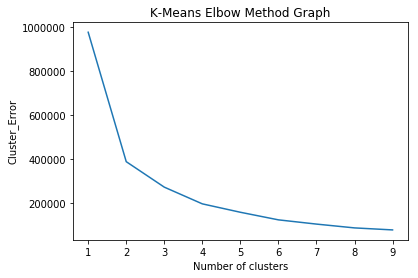

In [31]:
Cluster_Error =[]
for k in range(1, 10):
    kmeans_clusters = KMeans(n_clusters = k).fit(df)
    kmeans_clusters.fit(df)
    Cluster_Error.append(kmeans_clusters.inertia_)
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(1, 10), Cluster_Error)
plt.title('K-Means Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('Cluster_Error')
plt.show()